# AstronomyCalc tutorial
This is a tutorial to show an usage of the [AstronomyCalc](https://github.com/sambit-giri/AstronomyCalc) package.

### Setting the general code parameters

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import AstronomyCalc

In [2]:
code_param_dict = {'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}

# Model universes
Here simulation of a few model universes are shown.

### Einsten-de Sitter universe

In [3]:
cosmo_dict = {'Om': 1.0, 'Or': 0, 'Ok': 0, 'Ode': 0, 'h': 0.68}
param_EdS = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param_EdS.cosmo.__dict__)
print('Code parameters')
print(param_EdS.code.__dict__)

Cosmological parameters
{'Om': 1.0, 'Or': 0, 'Ok': 0, 'Ode': 0, 'h': 0.68}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [4]:
D_EdS = AstronomyCalc.CosmoDistances(param_EdS)

### de Sitter universe

In [5]:
cosmo_dict = {'Om': 0.0, 'Or': 0, 'Ok': 0, 'Ode': 1.0, 'h': 0.68}
param_dS = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param_dS.cosmo.__dict__)
print('Code parameters')
print(param_dS.code.__dict__)

Cosmological parameters
{'Om': 0.0, 'Or': 0, 'Ok': 0, 'Ode': 1.0, 'h': 0.68}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [6]:
D_dS = AstronomyCalc.CosmoDistances(param_dS)

### Benchmark model or Planck universe

In [7]:
cosmo_dict = {'Om': 0.31, 'Or': 0.0, 'Ok': 0.0, 'Ode': 0.69, 'h': 0.68}
param = AstronomyCalc.param(cosmo=cosmo_dict, code=code_param_dict)

print('Cosmological parameters')
print(param.cosmo.__dict__)
print('Code parameters')
print(param.code.__dict__)

Cosmological parameters
{'Om': 0.31, 'Or': 0.0, 'Ok': 0.0, 'Ode': 0.69, 'h': 0.68}
Code parameters
{'zmin': 0.01, 'zmax': 11.0, 'Nz': 100, 'verbose': True}


In [8]:
D = AstronomyCalc.CosmoDistances(param)

## Plot distances in model universes

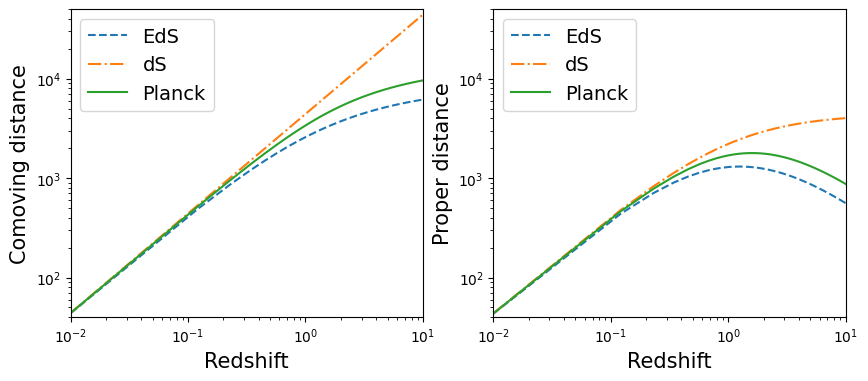

In [9]:
zs = np.linspace(param.code.zmin,param.code.zmax,param.code.Nz)

fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].loglog(zs, D_EdS.comoving_dist(zs), ls='--', label='EdS')
axs[0].loglog(zs, D_dS.comoving_dist(zs), ls='-.', label='dS')
axs[0].loglog(zs, D.comoving_dist(zs), ls='-', label='Planck')
axs[0].legend(loc=2, fontsize=14)
axs[0].set_xlabel('Redshift', fontsize=15)
axs[0].set_ylabel('Comoving distance', fontsize=15)
axs[0].axis([0.01,10,40,5e4])
axs[1].loglog(zs, D_EdS.proper_dist(zs), ls='--', label='EdS')
axs[1].loglog(zs, D_dS.proper_dist(zs), ls='-.', label='dS')
axs[1].loglog(zs, D.proper_dist(zs), ls='-', label='Planck')
axs[1].legend(loc=2, fontsize=14)
axs[1].set_xlabel('Redshift', fontsize=15)
axs[1].set_ylabel('Proper distance', fontsize=15)
axs[1].axis([0.01,10,40,5e4])
plt.show()